In [87]:
import numpy as np
from matplotlib import pyplot as plt
from random import randint
import math
import time


In [88]:
class City:
    def __init__(self, x, y, index):
        self.x = x
        self.y = y
        self.name = 'C' + str(index)

    def __str__(self):
        return "{}| [{},{}]".format(self.name, self.x, self.y)


In [89]:
cityCount = 4

In [90]:
linkDistance = {}

def getDistance(city1, city2, link, rLink):
    distance = math.hypot(city1.x - city2.x, city1.y - city2.y)
    linkDistance[link] = distance
    linkDistance[rLink] = distance
    return distance

def lookupDistance(city1, city2):
    link = "{}->{}".format(city1.name,city2.name)
    rLink = "{}->{}".format(city2.name,city1.name)
    distance = -1
    if link in linkDistance or rLink in linkDistance:
        distance = linkDistance.get(link)
    else:
        distance = getDistance(city1, city2, link, rLink)
    return distance


In [95]:
cachedSol = {}
cachedDist = {}

def lookupSolution(cKey, lookupCache):
    cDist = -1
    cRoute = []
    if lookupCache and cKey in cachedDist:
        cDist = cachedDist[cKey]
        cRoute = cachedSol[cKey]
    return cDist, cRoute

def solveDistance(startCity, subCityList, cout, lookupCache):
    routeDistance = -1
    localMinDistance = -1
    if len(subCityList) == 1:
        localRoute = [startCity]
        destCity = list(subCityList)[0]
        localRoute.append(destCity)
        localMinDistance = lookupDistance(startCity, destCity)
    else:
        for sCity in subCityList:
            startRouteDistance = lookupDistance(startCity, sCity)
            subCity = subCityList.copy() 
            subCity.remove(sCity)
            subRoute = []
            subRouteDistance = -1
            # subLink = sCity.name + " -> "
            subLink = ""
            for city in subCity:
                subLink = subLink + city.name + " -> "
            # subLink = subLink + " -> " + sCity.name 
            subRouteDistance, subRoute = lookupSolution(subLink, lookupCache)
            if subRouteDistance < 0:
                subRouteDistance, subRoute = solveDistance(sCity, subCity, cout, lookupCache)
    

            subRouteDistance = subRouteDistance + startRouteDistance
            if localMinDistance > subRouteDistance or localMinDistance < 0:
                localRoute = [startCity]
                localMinDistance = subRouteDistance
                for c in subRoute:
                    localRoute.append(c)
                count = len(localRoute)
                cachedSol[subLink] = localRoute
                cachedDist[subLink] = localMinDistance
                if count == cout:
                    print("Cities {} -> {} | Min Route[Changed]: {}".format(startCity, count, localMinDistance))
    routeDistance = localMinDistance
    subCityList = sorted(subCityList, key=lambda city: city.name)
    return routeDistance, localRoute

def printSolution(lapse, solution, minDist, start):
    print("Route Distance ({}): {} [{}]".format(lapse,len(solution), minDist))
    routeString = ""
    for city in solution:
        routeString = routeString + city.name + " -> "
        plt.annotate(city.name, (city.x, city.y))

    routeString = routeString + start.name

    print(routeString)
    x = [city.x for city in solution]
    y = [city.y for city in solution]
    x.append(start.x)
    y.append(start.y)
    plt.plot(x, y)

Cities C1| [68,54] -> 11 | Min Route[Changed]: 292.80463322382207
Cities C1| [68,54] -> 11 | Min Route[Changed]: 271.0687206665955
Route Distance (31.620290756225586): 11 [271.0687206665955]
C1 -> C11 -> C2 -> C6 -> C4 -> C10 -> C8 -> C7 -> C5 -> C3 -> C9 -> C1


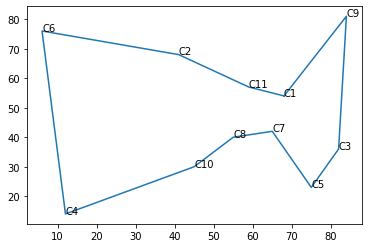

In [97]:
citySet = set()
index=1
linkDistance = {}
cityCount = 11
lookupCache = False


while len(citySet) < cityCount:
    x, y = randint(5, 100 ), randint(5, 100)
    citySet.add(City(x, y, index))
    index=index+1
    
citySet = sorted(citySet, key=lambda city: city.name)
c1 = citySet[0]
sCityList = citySet.copy() 
sCityList.remove(c1)
start = time.time()
routeDistance, route = solveDistance(c1, sCityList, cityCount, lookupCache)
end = time.time()
printSolution(end-start, route, routeDistance, c1)
# plt.show()

